In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from torch.optim.lr_scheduler import ExponentialLR


import time


In [132]:
df = pd.read_csv("../data/tesla_stock.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [133]:
X = df.get('Close').values
scaler = StandardScaler()
X = scaler.fit_transform(X.reshape((-1,1 ))).reshape((-1))

split_index = 1400
print(X.shape)
X_train, X_test = X[:split_index], X[split_index:] #train_test_split(X, test_size=0.1, shuffle=False)
timesteps_count = 30

def get_train_test():
    x_train, y_train, x_test, y_test = [], [], [], []

    i = 0
    while i+timesteps_count<len(X_train):
        x_train.append(np.expand_dims(X_train[i:i+timesteps_count],-1))
        y_train.append(X_train[i+timesteps_count])
        i+=1

    i=0
    while i+timesteps_count<len(X_test):
        x_test.append(np.expand_dims(X_test[i:i+timesteps_count],-1))
        y_test.append(X_test[i+timesteps_count])
        i+=1
        
    x_train, y_train = torch.tensor(np.array(x_train), dtype=torch.float), torch.tensor(np.array(y_train), dtype=torch.float)
    x_test, y_test = torch.tensor(np.array(x_test), dtype=torch.float), torch.tensor(np.array(y_test), dtype=torch.float)
    return x_train, y_train, x_test, y_test
x_train, y_train, x_test, y_test = get_train_test()
print(x_train.shape, y_train.shape)

(1692,)
torch.Size([1370, 30, 1]) torch.Size([1370])


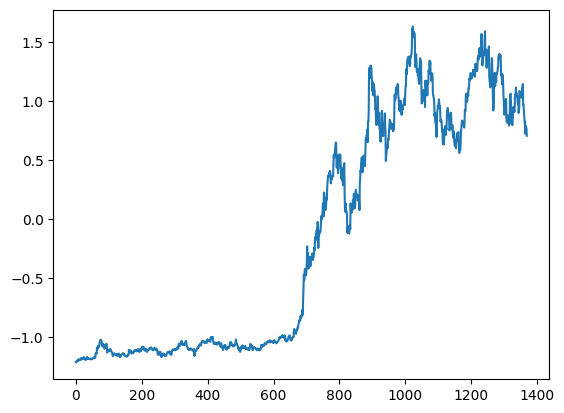

In [134]:
plt.plot(y_train)

## Develop an LSTM network

In [135]:
MAX_TIME = 3

In [136]:
class LSTMPredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim, n_layers):

        super(LSTMPredictor, self).__init__()
        self.hidden_dim = hidden_dim
        self.input_dim = input_dim

        self.lstm1 = nn.LSTM(input_dim, hidden_dim, num_layers=n_layers, batch_first=True)

        self.linear1 = nn.Linear(hidden_dim, 1)

        self.n_layers = n_layers

    def forward(self, x):
        print("x", x.shape)
        BATCH_SIZE = x.shape[0]
        hidden_state = torch.zeros((self.n_layers, BATCH_SIZE, self.hidden_dim))
        cell_state = torch.zeros((self.n_layers, BATCH_SIZE, self.hidden_dim))
        initial_state = (hidden_state, cell_state)
        out = x
        print("out", out.shape)
        if len(x.shape)==2:
            out = x.unsqueeze(-1)
        print(out)
        out,state_out = self.lstm1(out, initial_state)
        print(out.shape)
        out = self.linear1(out[:, -1])
        #out = self.linear2(out)
        out = out.view((-1, ))
        return out


class LinearPredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim):

        super(LinearPredictor, self).__init__()
        self.hidden_dim = hidden_dim
        self.input_dim = input_dim
        self.linear1 = nn.Linear(input_dim, 1)
        #self.linear2 = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        out = x
       
        out = self.linear1(out)
        #out = nn.ReLU()(out)
        #out = self.linear2(out)
        out = out.view((-1, ))
        return out




  0%|          | 0/3 [00:00<?, ?it/s]

out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size

 33%|███▎      | 1/3 [00:01<00:02,  1.00s/it]

out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size

 67%|██████▋   | 2/3 [00:02<00:01,  1.03s/it]

torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 

 67%|██████▋   | 2/3 [00:03<00:01,  1.51s/it]

torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])
out torch.Size([256, 30, 1])
torch.Size([256, 30, 2])
torch.Size([256])


Text(0.5, 1.0, 'Train')

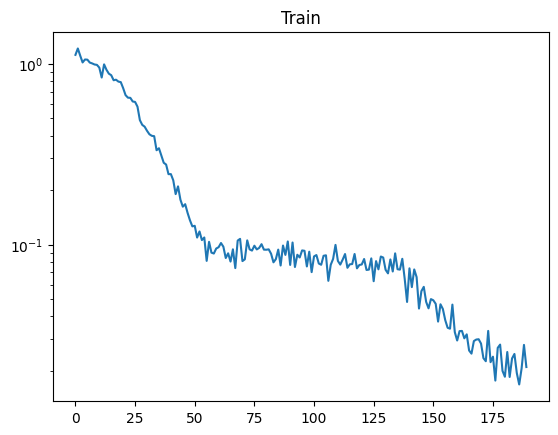

In [137]:
n_layers = 2

hidden_dim = 2

model = LSTMPredictor(1, hidden_dim = hidden_dim, n_layers=n_layers)
#model = LinearPredictor(x_train.shape[1], hidden_dim = 60)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
scheduler = ExponentialLR(optimizer, gamma=0.999)
EPOCHS = 10
BATCH_SIZE = 256
N = x_train.shape[0]
losses_adam = []
t0 = time.time()
t1 = time.time()



with tqdm(total=MAX_TIME) as pbar:
    while time.time()<t0+MAX_TIME:
        if time.time()>t1+1:
            t1 = time.time()
            pbar.update()
        
        indices = np.arange(len(x_train))
        np.random.shuffle(indices)
        x_train = x_train[indices]
        y_train = y_train[indices]
        #print(indices.shape)
        for i in range(N//BATCH_SIZE+1):
            model.zero_grad()
            batch_x = x_train[i*BATCH_SIZE: (i+1)*BATCH_SIZE]
            batch_y = y_train[i*BATCH_SIZE: (i+1)*BATCH_SIZE]
            if len(batch_x)<BATCH_SIZE:
                continue
            output = model(batch_x)
            print(output.shape)
            loss = loss_fn(output, batch_y)
            loss.backward()
            optimizer.step()

            losses_adam.append(loss.detach().numpy())
        scheduler.step

 
plt.semilogy(losses_adam)
plt.title("Train")

out torch.Size([262, 30, 1])
torch.Size([262, 30, 2])
out torch.Size([1370, 30, 1])
torch.Size([1370, 30, 2])
tensor(174.6677, dtype=torch.float64)


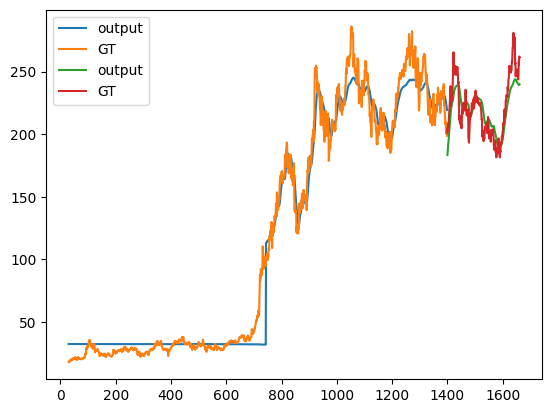

In [138]:
def test(model):
    with torch.no_grad():
        
        output = model(x_test)
        unscaled_output = scaler.inverse_transform(output.reshape((-1, 1))).reshape((-1, ))
        unscaled_y_test = scaler.inverse_transform(y_test.reshape((-1, 1))).reshape((-1,))

        output = model(x_train)

        unscaled_output_train = scaler.inverse_transform(output.reshape((-1, 1))).reshape((-1, ))
        unscaled_y_train = scaler.inverse_transform(y_train.reshape((-1, 1))).reshape((-1,))


        loss = loss_fn(torch.tensor(unscaled_output),torch.tensor(unscaled_y_test ))
        plt.figure()
        #print(unscaled_output_train.shape)
        plt.plot(np.arange(timesteps_count, split_index), unscaled_output_train, label="output")
        plt.plot(np.arange(timesteps_count, split_index), unscaled_y_train, label="GT")
        
        plt.plot(np.arange(split_index, split_index+len(x_test)), unscaled_output, label="output")
        plt.plot(np.arange(split_index, split_index+len(x_test)), unscaled_y_test, label="GT")
        plt.legend()
        print(loss)
x_train, y_train, x_test, y_test = get_train_test()

test(model)

## Predicting with moving average

In [139]:
window_size = 50
df["MA"] = df["Close"].rolling(window_size).mean()

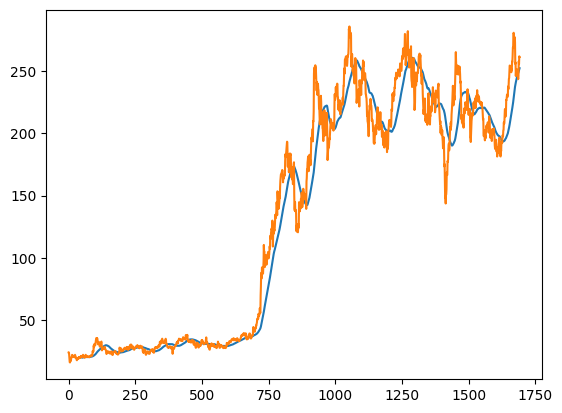

In [140]:
plt.plot(df["MA"])
plt.plot(df["Close"])

## Prediction with exponential average

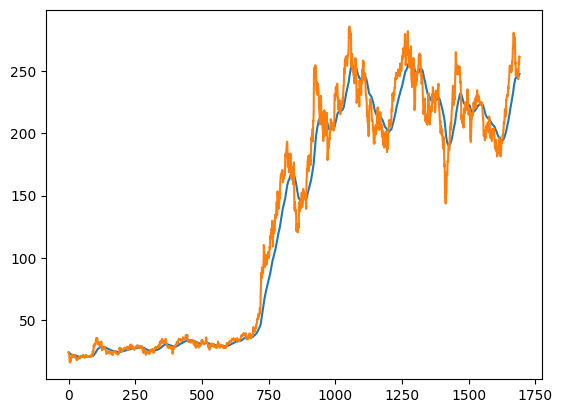

In [141]:
df["EA"] = df["Close"].ewm(span=window_size, adjust=False).mean()
plt.plot(df["EA"])
plt.plot(df["Close"])


In [142]:
%load_ext autoreload
%autoreload 2

from functions.PyTorchGN import NN_GN
from algorithms.algo2 import optimize

x_train, y_train, x_test, y_test = get_train_test()

y_train = y_train.reshape((-1, 1)).detach().numpy()
x_train = x_train.detach().numpy()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [143]:
model = LSTMPredictor(1, hidden_dim = hidden_dim, n_layers=n_layers)


#model = LinearPredictor(input_dim, hidden_dim)
nn_gn = NN_GN(model, is_linear=False)
X0 = np.zeros_like(nn_gn.get_X())


print(x_train.shape, y_train.shape, X0.shape)
## Do Gauss Newton

X_est,losses_gn, _, timer = optimize(nn_gn, X0, x_train, y_train, batch_size=800 ,
max_time=MAX_TIME,backtrack=True,optimization_method="Random columns", optim_params={"keep_prob": 0.7})

print(np.linalg.norm(X_est-X0))
plt.semilogy(losses_gn)

(1370, 30, 1) (1370, 1) (91,)
Parameter count 91
out torch.Size([24000, 1])
torch.Size([24000, 1, 2])


ValueError: operands could not be broadcast together with shapes (24000,) (800,) 

out torch.Size([262, 30, 1])
torch.Size([262, 30, 30])
out torch.Size([1370, 30, 1])
torch.Size([1370, 30, 30])
tensor(8489.3756, dtype=torch.float64)


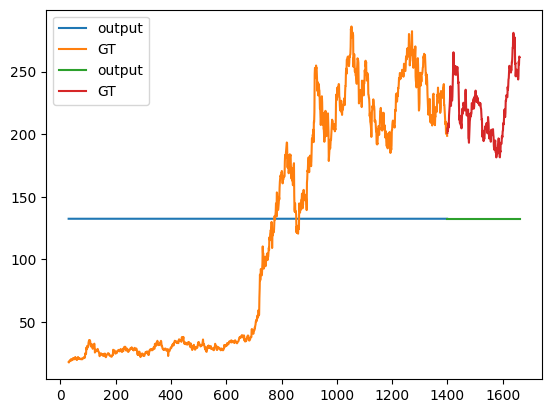

In [ ]:
x_train, y_train, x_test, y_test = get_train_test()


test(model)

In [ ]:
idx = np.round(np.linspace(0, len(losses_adam) - 1, len(losses_gn))).astype(int)
plt.semilogy(np.array(losses_adam)[idx], label="Adam")
plt.semilogy(losses_gn, label="GN")
plt.legend()

NameError: name 'losses_gn' is not defined

: 